# Data Augmentation

**Measures**:
* **Val loss TRAIN**
* **Test MSE**
* **Test PSNR**
* **Test SSIM**
* **Cualitative: show reconstruction, normal and with augmentation**


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DataAugmentation" data-toc-modified-id="DataAugmentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DataAugmentation</a></span><ul class="toc-item"><li><span><a href="#MSE-LOSS" data-toc-modified-id="MSE-LOSS-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>MSE LOSS</a></span><ul class="toc-item"><li><span><a href="#Quantitative" data-toc-modified-id="Quantitative-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Quantitative</a></span><ul class="toc-item"><li><span><a href="#Training-and-validation" data-toc-modified-id="Training-and-validation-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>Training and validation</a></span></li><li><span><a href="#Test-set" data-toc-modified-id="Test-set-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>Test set</a></span></li></ul></li><li><span><a href="#Qualitative-(How-it-reconstruct)---Only-in-Test" data-toc-modified-id="Qualitative-(How-it-reconstruct)---Only-in-Test-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Qualitative (How it reconstruct) - Only in Test</a></span><ul class="toc-item"><li><span><a href="#From-'clean'-images" data-toc-modified-id="From-'clean'-images-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>From 'clean' images</a></span></li><li><span><a href="#From-corrupted-inputs" data-toc-modified-id="From-corrupted-inputs-1.1.2.2"><span class="toc-item-num">1.1.2.2&nbsp;&nbsp;</span>From corrupted inputs</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [1]:
import glob
import os

## DataAugmentation

### MSE LOSS
#### Quantitative

* **PSNR**
$$PSNR=10\times \log_{10}\frac{peakval^2}{MSE(x,y)}$$
* **DSSIM**
$$Structural Dissimilarity = DSSIM = \frac{1-SSIM(x,y)}{2}$$


##### Training and validation

In [2]:
from create_test_report import TestMetricWrapper
model_folders = glob.glob('results/Data_Aug/*')
model_folders  = [mf for mf in model_folders if 'qualitative' not in mf]
TEST_img_PATH = '..'+os.path.sep+'IXI-T1'+os.path.sep+'PNG'+os.path.sep+'test_folder'+os.path.sep+'test'
test_img_files = glob.glob(TEST_img_PATH+os.path.sep+'*.png')

In [3]:
noaug_mse_test_metrics = TestMetricWrapper(model_folders,test_img_files)

In [4]:
_,_ = noaug_mse_test_metrics.get_training_df()
noaug_mse_test_metrics.get_min_validation_loss_df()

,Val_loss,Epoch
small_res_cae_MSE_full_pre_AUG_NoKReg_LRPlat,0.0001545063,56.0
skip_con_cae_MSE_AUG_NoKReg_LRPlat,0.0003095633,15.0
myronenko_cae_MSE_AUG_NoKReg_LRPlat,0.0003382372,5.0
small_res_cae_MSE_full_pre_AUG_L2KReg_LRPlat,0.0003724099,38.0


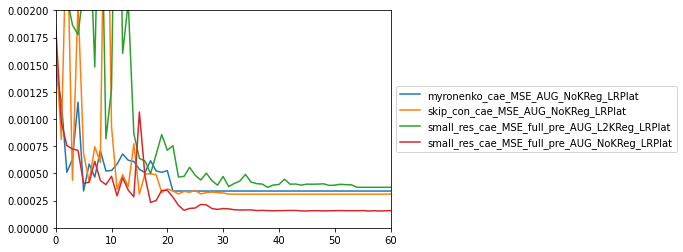

In [5]:
noaug_mse_test_metrics.plot_val_loss(ylimit = 0.002, epochs=60)

##### Test set

***Method for getting metrics with keras_evaluate***: *WARN: Metric for models with L2reg add some variation due to L2 in loss*.
```python
na_mse_kers_df = noaug_mse_test_metrics.get_keras_evaluation(return_type='df', verbose=2)
na_mse_kers_df
```

In [6]:
na_mse_kers_df = noaug_mse_test_metrics.get_keras_evaluation(return_type='df', verbose=2)
na_mse_kers_df

myronenko_cae_MSE_AUG_NoKReg_LRPlat - 603/603 - 9s - loss: 3.2674e-04 - DSSIM: 0.0157 - PSNR: 35.0768
skip_con_cae_MSE_AUG_NoKReg_LRPlat - 603/603 - 4s - loss: 2.9858e-04 - DSSIM: 0.0094 - PSNR: 35.6798
small_res_cae_MSE_full_pre_AUG_L2KReg_LRPlat - 603/603 - 4s - loss: 3.6564e-04 - DSSIM: 0.0114 - PSNR: 35.2248
small_res_cae_MSE_full_pre_AUG_NoKReg_LRPlat - 603/603 - 4s - loss: 1.5038e-04 - DSSIM: 0.0067 - PSNR: 38.5752


,loss,DSSIM,PSNR
myronenko_cae_MSE_AUG_NoKReg_LRPlat,0.0003267354,0.0156768858,35.0768165588
skip_con_cae_MSE_AUG_NoKReg_LRPlat,0.0002985806,0.0093556745,35.6797752380
small_res_cae_MSE_full_pre_AUG_L2KReg_LRPlat,0.0003656356,0.0114325080,35.2247695923
small_res_cae_MSE_full_pre_AUG_NoKReg_LRPlat,0.0001503847,0.0067493357,38.5751533508


In [7]:
na_mse_custom_df = noaug_mse_test_metrics.get_custom_evaluation(return_type='df', verbose=True)
na_mse_custom_df.sort_values('mse_mean')

myronenko_cae_MSE_AUG_NoKReg_LRPlat - MSE: 3.27e-04+-1.06e-04 - DSSIM: 1.57e-02+-5.29e-03 - PSNR: 3.51e+01+-1.38e+00

skip_con_cae_MSE_AUG_NoKReg_LRPlat - MSE: 2.99e-04+-1.34e-04 - DSSIM: 9.36e-03+-8.01e-03 - PSNR: 3.57e+01+-1.97e+00

small_res_cae_MSE_full_pre_AUG_L2KReg_LRPlat - MSE: 3.24e-04+-1.25e-04 - DSSIM: 1.14e-02+-3.97e-03 - PSNR: 3.52e+01+-1.72e+00

small_res_cae_MSE_full_pre_AUG_NoKReg_LRPlat - MSE: 1.50e-04+-6.33e-05 - DSSIM: 6.75e-03+-5.00e-03 - PSNR: 3.86e+01+-1.72e+00



,mse_mean,mse_std,dssim_mean,dssim_std,psnr_mean,psnr_std
small_res_cae_MSE_full_pre_AUG_NoKReg_LRPlat,0.0001503846,0.0000632999,0.0067494716,0.0049995780,38.5751647949,1.7231843472
skip_con_cae_MSE_AUG_NoKReg_LRPlat,0.0002985807,0.0001340608,0.0093559008,0.0080132559,35.6797828674,1.9669383764
small_res_cae_MSE_full_pre_AUG_L2KReg_LRPlat,0.0003237482,0.0001251418,0.0114326924,0.0039694123,35.2247657776,1.7153180838
myronenko_cae_MSE_AUG_NoKReg_LRPlat,0.0003267356,0.0001061308,0.0156771950,0.0052905730,35.0767936707,1.3778543472


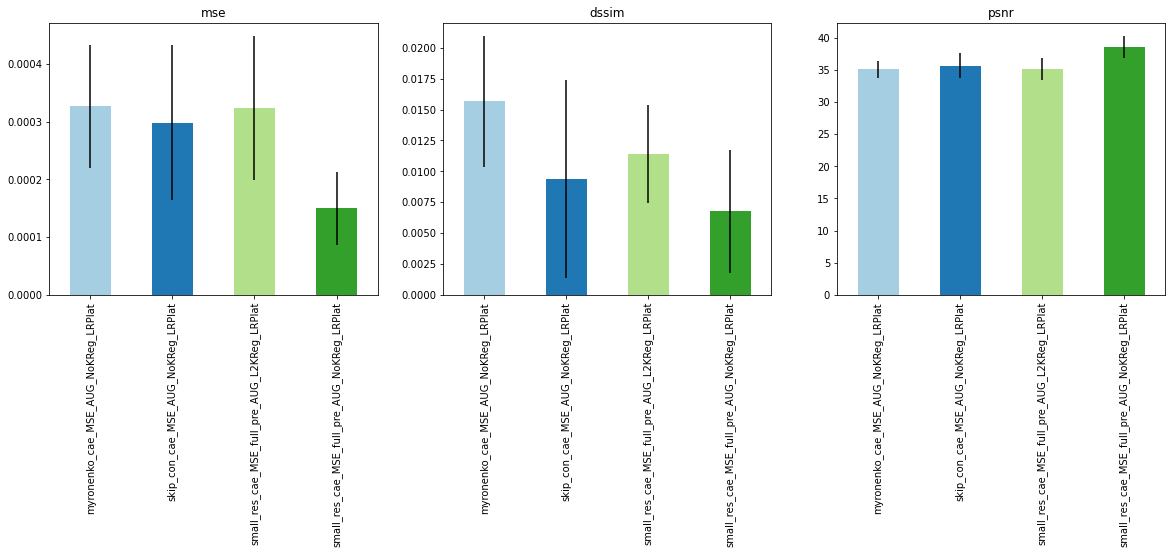

In [8]:
no_aug_mse_plot = noaug_mse_test_metrics.plot_custom_metrics()

#### Qualitative (How it reconstruct) - Only in Test
##### From 'clean' images
How the models reconstruct unmodified input MRIs?

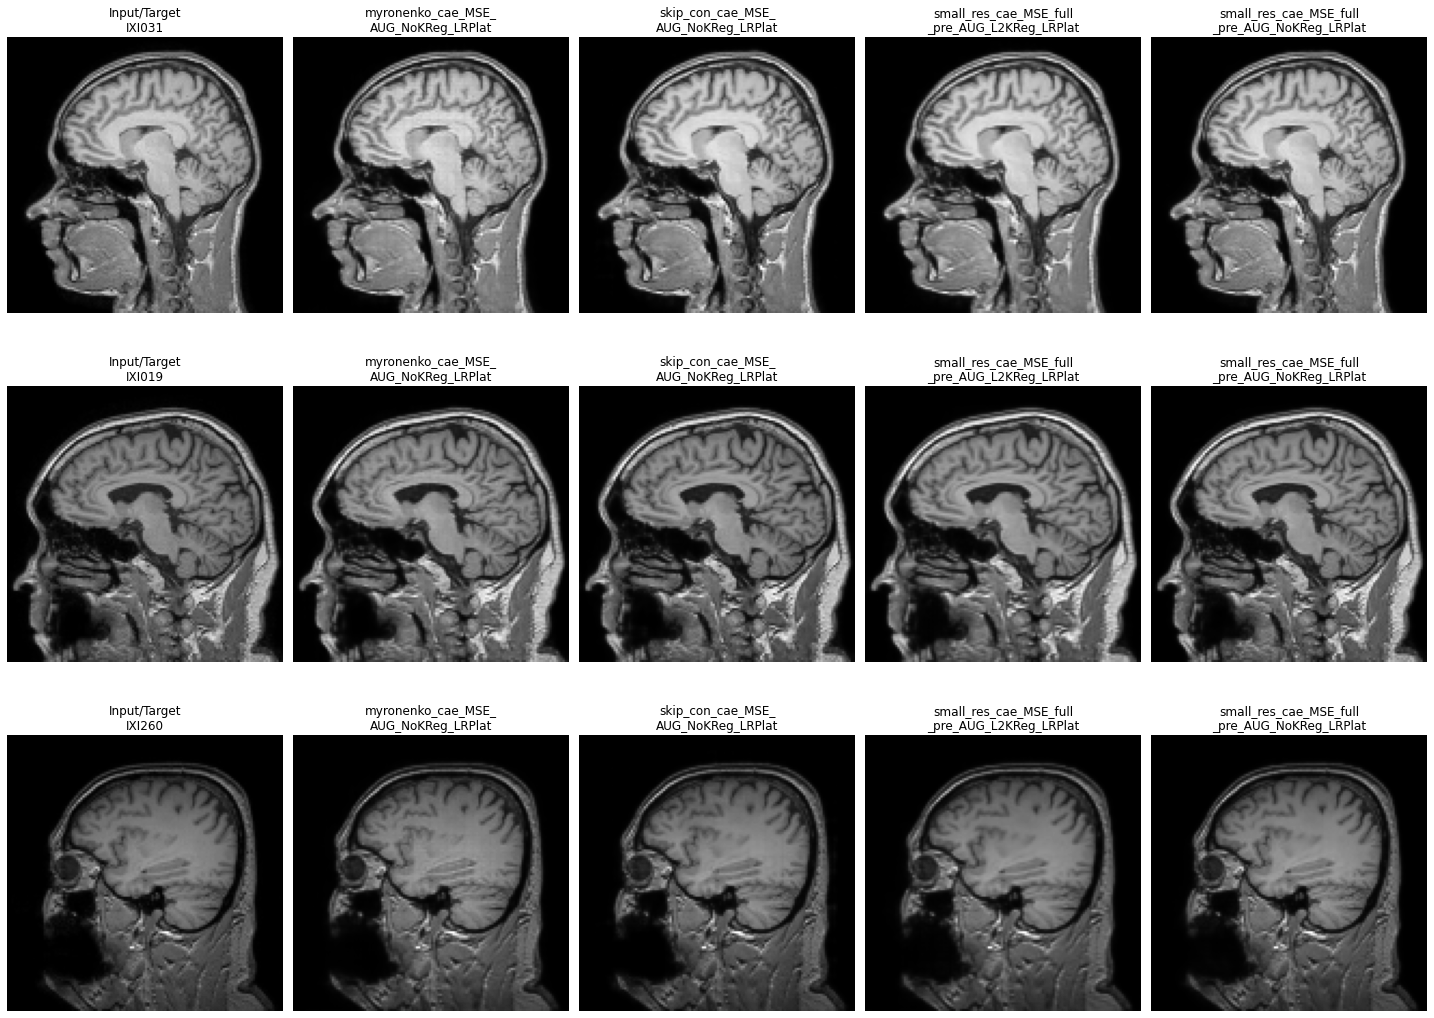

In [9]:
clear_mris = noaug_mse_test_metrics.plot_images(id_images = [183,75], n_random=1, figsize=(20,15)) #id=800 is a good slice too

##### From corrupted inputs

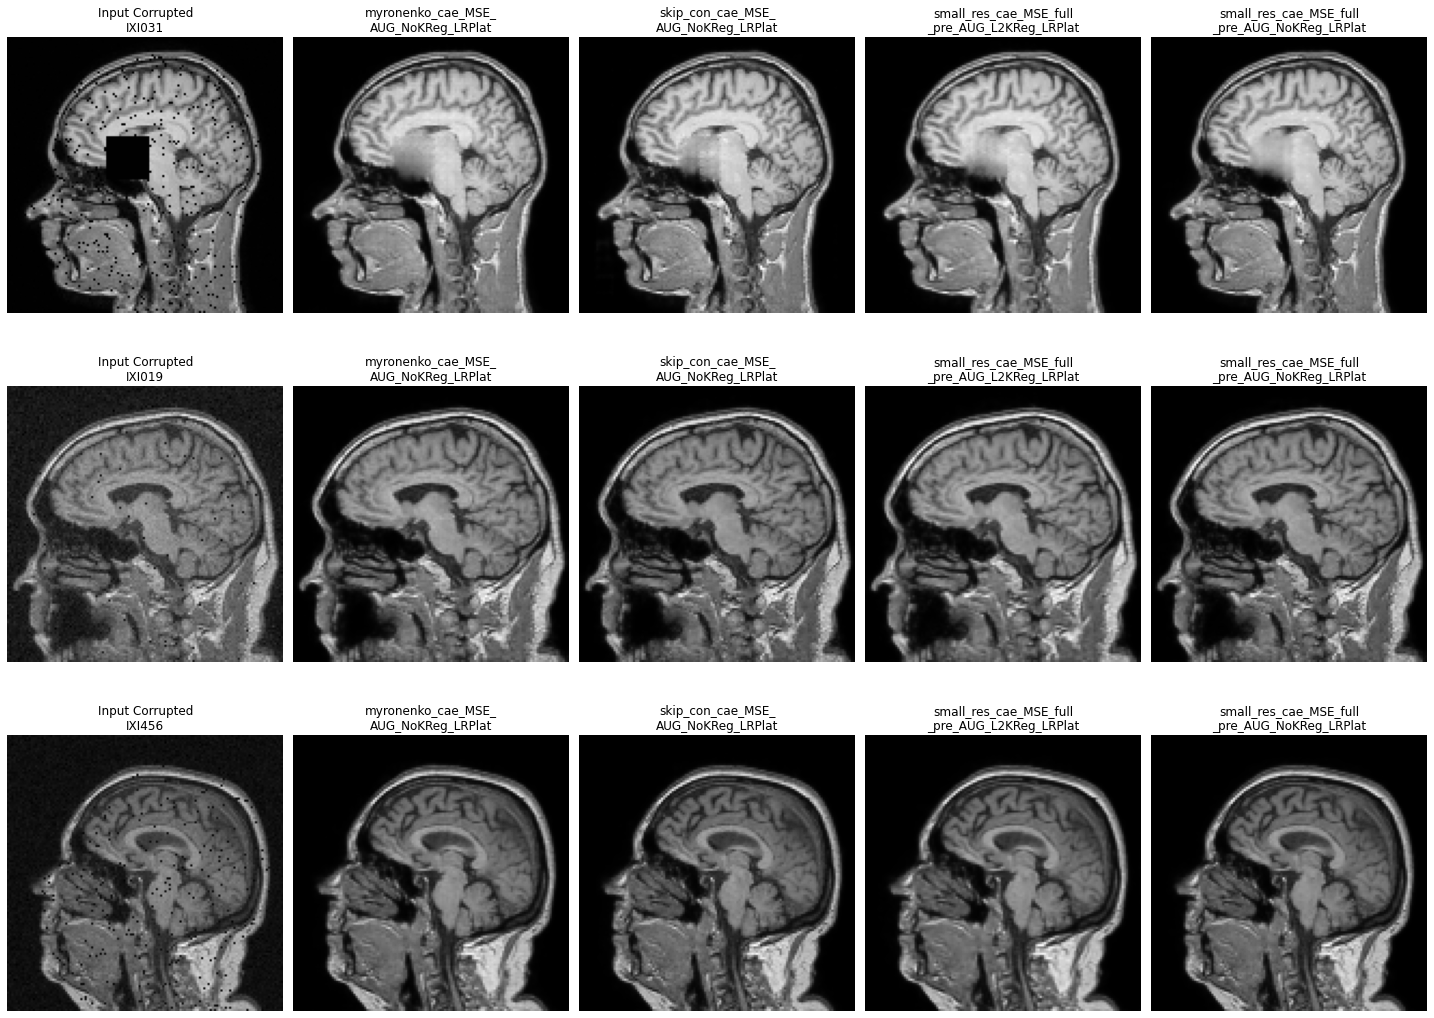

In [22]:
corrupted_mris, sel_images = noaug_mse_test_metrics.plot_corrupted_images(id_images = [183,75], n_random=1, figsize=(20,15)) # 6 